In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# Importation des données

data = pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
data.shape

(99999, 226)

In [5]:
data.isnull().values.sum()

3594931

In [6]:
# Estimateurs statistiques simples
    # Moyennes, écarts-types, minimum, maximum, quartiles...
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
aon,99999.0,1.219855e+03,954.733842,1.800000e+02,4.670000e+02,8.630000e+02,1.807500e+03,4.337000e+03
aug_vbc_3g,99999.0,6.817025e+01,267.580450,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.291622e+04
jul_vbc_3g,99999.0,6.683906e+01,271.201856,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.165600e+03
jun_vbc_3g,99999.0,6.002120e+01,253.938223,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.116621e+04


In [7]:
data.isna().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [8]:
#Let's display categoricals variables
categorical = [var for var in data.columns if data[var].dtype == 'O']
print(categorical)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


Toutes les variables catégorielles sont des dates

In [9]:
data[categorical].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


In [10]:
# Missing Data in categorical variables
data[categorical].isnull().sum()

last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
dtype: int64

In [11]:
#Let's display numericals variables
numerical = [var for var in data.columns if data[var].dtype != 'O']
print(numerical)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f

In [12]:
data[numerical].head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [13]:
# Missing Data in categorical variables
data[categorical].isnull().sum()

last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
dtype: int64

In [14]:
lst_av_rech = ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
data[lst_av_rech].head()

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,252.0,252.0,252.0,NaN
1,NaN,154.0,50.0,NaN
2,NaN,NaN,NaN,46.0
3,NaN,NaN,NaN,NaN
4,56.0,NaN,NaN,NaN


In [15]:
for col in numerical:
        col_median = data[col].median()
        data[col].fillna(col_median, inplace=True)

In [16]:
data[lst_av_rech].head()

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,252.0,252.0,252.0,164.0
1,154.0,154.0,50.0,164.0
2,154.0,154.0,154.0,46.0
3,154.0,154.0,154.0,164.0
4,56.0,154.0,154.0,164.0


In [17]:
# Checking Missing Data in numerical variables
data[numerical].isnull().sum()

mobile_number     0
circle_id         0
loc_og_t2o_mou    0
std_og_t2o_mou    0
loc_ic_t2o_mou    0
                 ..
aon               0
aug_vbc_3g        0
jul_vbc_3g        0
jun_vbc_3g        0
sep_vbc_3g        0
Length: 214, dtype: int64

In [18]:
data[numerical].isnull().values.sum()

0

In [19]:
data['amt_rech_67'] = data['total_rech_amt_6'] + data['total_rech_amt_7']+ data['av_rech_amt_data_6']+ data['av_rech_amt_data_7']
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,1.0,1.0,1.0,1.0,968,30.4,0.0,101.20,3.58,1118.0
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,1.0,1.0,1.0,1.0,1006,0.0,0.0,0.00,0.00,766.0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,1.0,1.0,1.0,1.0,1103,0.0,0.0,4.17,0.00,791.0
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,1.0,1.0,1.0,1.0,2491,0.0,0.0,0.00,0.00,848.0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0.0,1.0,1.0,1.0,1526,0.0,0.0,0.00,0.00,756.0


In [20]:
data['amt_rech_67'].tail()

99994     478.0
99995     528.0
99996     312.0
99997    1680.0
99998    1018.0
Name: amt_rech_67, dtype: float64

Fonction pour le calcul des centiles

In [21]:
import math
import functools

def percentile(dt, perc: int):
    size = len(dt)
    return sorted(dt)[int(math.ceil((size * perc) / 100)) - 1]

In [22]:
print(percentile(data['amt_rech_67'], 70))

1062.0


L'on ne peut obtenir environ 29900 abonnés que si nous sélectionnons les montants de consommation strictement supérieurs à 1062. En incluant ce montant, dans le critère de sélection nous obtenons 30010 abonnés.

In [23]:
df_perc_70 = data.loc[data['amt_rech_67'] > 1062.0, :]
df_perc_70.shape

(29960, 227)

Visualisons les données qui serviront au marquage des abonnés. Elles eprmettront de dire si oui ou non un abonné s'est désabonné.

In [24]:
df_perc_70[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.0,0.0
7,0.00,0.00,0.0,0.0
8,34.91,142.18,0.0,0.0
13,631.86,446.09,0.0,0.0
16,334.56,255.74,0.0,0.0


Marquons les abonnés avec aperçu des données

In [25]:
df_perc_70['Churn'] = np.where(((df_perc_70['total_ic_mou_9'] == 0) | (df_perc_70['total_og_mou_9'] == 0)) & ((df_perc_70['vol_2g_mb_9'] == 0) | (df_perc_70['vol_3g_mb_9'] == 0)), 1, 0)
df_perc_70.head()

/tmp/ipykernel_10147/521298931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perc_70['Churn'] = np.where(((df_perc_70['total_ic_mou_9'] == 0) | (df_perc_70['total_og_mou_9'] == 0)) & ((df_perc_70['vol_2g_mb_9'] == 0) | (df_perc_70['vol_3g_mb_9'] == 0)), 1, 0)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67,Churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1118.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,1.0,1.0,1.0,802,57.74,19.38,18.74,0.00,2678.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,1369.0,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,1.0,1.0,1.0,2607,0.00,0.00,0.00,0.00,1068.0,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,1.0,1.0,1.0,511,0.00,2.45,21.89,0.00,1226.0,0


In [26]:
#Let's display numericals variables
df_numeric = [var for var in df_perc_70.columns if df_perc_70[var].dtype != 'O']
print(df_numeric)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f

In [27]:
df_perc_70[df_numeric].head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67,Churn
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,...,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1118.0,1
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,1.0,1.0,1.0,802,57.74,19.38,18.74,0.00,2678.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,1369.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,...,1.0,1.0,1.0,2607,0.00,0.00,0.00,0.00,1068.0,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,1.0,1.0,1.0,511,0.00,2.45,21.89,0.00,1226.0,0


In [28]:
df_num = df_perc_70[df_numeric]
df_num.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67,Churn
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,...,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1118.0,1
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,1.0,1.0,1.0,802,57.74,19.38,18.74,0.00,2678.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,1369.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,...,1.0,1.0,1.0,2607,0.00,0.00,0.00,0.00,1068.0,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,1.0,1.0,1.0,511,0.00,2.45,21.89,0.00,1226.0,0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,...,1.0,1.0,1.0,667,0.00,0.00,0.00,0.00,1124.0,0
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,...,1.0,1.0,1.0,720,0.00,0.00,0.00,0.00,1588.0,0
24,7001125315,109,0.0,0.0,0.0,422.050,359.730,354.793,473.030,124.19,...,1.0,1.0,1.0,3072,0.00,0.00,0.00,0.00,1078.0,0
33,7000149764,109,0.0,0.0,0.0,977.020,2362.833,409.230,799.356,0.00,...,1.0,1.0,1.0,1328,358.10,2706.83,1714.67,0.00,7474.0,0
38,7000815202,109,0.0,0.0,0.0,363.987,486.558,393.909,391.709,248.99,...,1.0,1.0,0.0,1155,0.00,0.00,0.00,0.00,1364.0,0


In [29]:
print(df_numeric)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f

Filtrons la liste des éléments de la liste "df_numeric" qui contient les libellés des colonnes du dataset

In [30]:
for col_9 in df_numeric:
    if col_9.endswith('_9'):
        df_numeric.remove(col_9)
        
print(df_numeric)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og

In [31]:
len(df_numeric)

165

In [32]:
df = df_perc_70[df_numeric]
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67,Churn
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,...,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1118.0,1
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,...,1.0,1.0,1.0,802,57.74,19.38,18.74,0.00,2678.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,1369.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,...,1.0,1.0,1.0,2607,0.00,0.00,0.00,0.00,1068.0,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,1.0,1.0,1.0,511,0.00,2.45,21.89,0.00,1226.0,0


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,29960.0,7.001221e+09,685052.836748,7.000000e+09,7.000637e+09,7.001232e+09,7.001811e+09,7.002411e+09
circle_id,29960.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,29960.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,29960.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,29960.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
jul_vbc_3g,29960.0,1.554759e+02,433.770996,0.000000e+00,0.000000e+00,0.000000e+00,3.909500e+01,9.165600e+03
jun_vbc_3g,29960.0,1.384498e+02,407.500179,0.000000e+00,0.000000e+00,0.000000e+00,1.538000e+01,1.116621e+04
sep_vbc_3g,29960.0,6.889262e+00,49.649472,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.618570e+03
amt_rech_67,29960.0,1.784888e+03,1071.155755,1.063000e+03,1.236000e+03,1.494000e+03,1.991250e+03,7.583300e+04


In [34]:
df.nunique()

mobile_number     29960
circle_id             1
loc_og_t2o_mou        1
std_og_t2o_mou        1
loc_ic_t2o_mou        1
                  ...  
jul_vbc_3g         8127
jun_vbc_3g         7605
sep_vbc_3g         2283
amt_rech_67        3416
Churn                 2
Length: 165, dtype: int64

Sur la base de la fonction "nunique", les variables "mobile_number", "circle_id", "loc_og_t2o_mou", "std_og_t2o_mou" et "loc_ic_t2o_mou" ne nous semblent pas pertinentes pour l'analyse du phénomène de désabonnement des clients de l'entreprise de télécom.
la variable "CustomerID" renseigne qu'il existe autant de numéro de téléphone que d'abonnés dans ce jeu de données;
concernant les autres variables, leurs valeurs respectives sont des constantes et par conséquent, pas d'informations pertinentes.

In [35]:
df.drop(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis=1, inplace = True)
df.head()

/tmp/ipykernel_10147/1016723695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis=1, inplace = True)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67,Churn
0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,...,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1118.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,...,1.0,1.0,1.0,802,57.74,19.38,18.74,0.00,2678.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,...,1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,1369.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.280,482.46,23.53,...,1.0,1.0,1.0,2607,0.00,0.00,0.00,0.00,1068.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.740,162.76,0.00,...,1.0,1.0,1.0,511,0.00,2.45,21.89,0.00,1226.0,0


Recherchons les variables qui pourraient avoir des constantes dans le jeu de données

In [36]:
const_columns = df.nunique()[df.nunique() == 1].keys().tolist()
const_columns

['std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [37]:
df[['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']].head()

,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'], axis=1, inplace = True)
df.head()

/tmp/ipykernel_10147/2217009177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'], axis=1, inplace = True)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67,Churn
0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,...,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1118.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,...,1.0,1.0,1.0,802,57.74,19.38,18.74,0.00,2678.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,...,1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,1369.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.280,482.46,23.53,...,1.0,1.0,1.0,2607,0.00,0.00,0.00,0.00,1068.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.740,162.76,0.00,...,1.0,1.0,1.0,511,0.00,2.45,21.89,0.00,1226.0,0


Ière PARTIE: MODELISATION AVEC ANALYSE EN COMPOSANTES PRINCIPALES

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [40]:
df_pca = df.copy()

In [41]:
churn = df_pca['Churn']
df_pca.drop(columns=['Churn'], inplace = True)

In [42]:
df_pca.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67
0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,...,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1118.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,...,0,1.0,1.0,1.0,802,57.74,19.38,18.74,0.00,2678.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,...,0,1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,1369.0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.280,482.46,23.53,...,0,1.0,1.0,1.0,2607,0.00,0.00,0.00,0.00,1068.0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.740,162.76,0.00,...,0,1.0,1.0,1.0,511,0.00,2.45,21.89,0.00,1226.0


In [43]:
df_pca_array = df_pca.values

pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components=0.7))])

data_pca = pipe.fit_transform(df_pca_array)
data_pca

array([[ 2.89843307, -3.90208693, -0.51257948, ...,  0.04190762,
        -0.6215906 ,  0.67590624],
       [ 2.82356109,  6.21405656, -1.57278901, ..., -0.90096581,
        -1.14899781, -0.81524155],
       [-1.48363007, -2.93747026, -0.08571961, ..., -0.05622758,
         0.15351919, -0.33879124],
       ...,
       [ 0.028611  ,  6.17116884, -3.39777356, ...,  0.36588974,
        -0.28913982, -0.44758077],
       [-0.46165455,  1.36469781, -3.59755293, ..., -3.20564407,
         0.60362077, -0.33970798],
       [ 9.35546883, -4.70013891,  2.09166418, ...,  0.38698003,
         1.6389049 , -0.08100687]])

In [44]:
data_pca.shape[1]

25

Au regard des résultats obtenus ci-dessus, nous constatons que suite au mécanisme de réduction de la dimensionnalité du jeu de données, sur les 153 variables retenues, 25 d'entre elles expriment 70% de l'information globale.

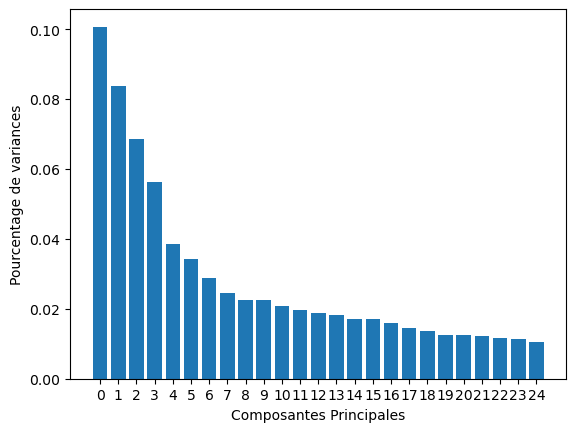

In [45]:
# Visualisation du pourcentage de variance expliquée par chaque composante
plt.bar(range(pipe[1].n_components_), pipe[1].explained_variance_ratio_)
plt.xlabel('Composantes Principales')
plt.ylabel('Pourcentage de variances')
plt.xticks(range(pipe[1].n_components_))
plt.show()

Transformons le tableau Numpy obtenu en dataframe

In [46]:
X = pd.DataFrame(data_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25'])
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,2.898433,-3.902087,-0.512579,-3.158292,-0.477630,-0.218241,-0.053970,-0.321478,0.601460,0.461044,...,-0.334171,0.848536,-1.097093,-0.513113,0.287225,-0.262824,0.320196,0.041908,-0.621591,0.675906
1,2.823561,6.214057,-1.572789,-2.570285,1.898112,6.517186,3.424053,-3.775849,-1.854479,3.771343,...,0.677740,1.169383,-1.956924,-0.843606,1.474385,-2.463712,1.828104,-0.900966,-1.148998,-0.815242
2,-1.483630,-2.937470,-0.085720,0.930641,-0.847489,-0.165388,0.777635,0.002618,0.058049,-1.111470,...,-0.191709,-0.064425,1.053245,0.188880,-0.106089,0.403567,-0.666876,-0.056228,0.153519,-0.338791
3,-1.794208,1.044442,-0.904856,0.405744,5.499015,-0.247908,1.433787,0.460989,1.453581,-0.112806,...,3.014083,-1.314152,-0.542682,0.244004,-0.009524,-0.968102,0.824910,-0.637521,0.276423,-0.112086
4,-1.116950,-1.296366,-2.257416,-0.837160,1.041882,-0.035843,-0.010410,0.060570,0.964823,0.043749,...,-0.226023,0.021443,-0.133227,-0.108272,0.108327,-0.037627,0.066474,0.275102,-0.424827,-0.137227


In [47]:
X.isna().values.sum()

0

Ajoutons au dataframe obtenu, la variable cible 'Churn'

In [48]:
# churn = df_pca['Churn']
y = pd.DataFrame(churn, columns= ['Churn'])
y.head()

,Churn
0,1
7,1
8,0
13,0
16,0


In [49]:
y.shape

(29960, 1)

In [50]:
seed = 11
from sklearn.model_selection import train_test_split

Divisons le dataset en trois parties:
Données d'entrainement : 60%
Données de test : 20%
Données de validation : 20%

In [51]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = seed, stratify = y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = seed, stratify = y_test)

Proportion des données de la variable cible

In [52]:
pd.DataFrame(y).value_counts(normalize = True)

Churn
0        0.896929
1        0.103071
dtype: float64

Seuls 10% d'abonnées ont résilié leur abonnement

In [53]:
pd.DataFrame(y_test).value_counts(normalize = True)

Churn
0        0.896862
1        0.103138
dtype: float64

In [54]:
pd.DataFrame(y_val).value_counts(normalize = True)

Churn
0        0.897029
1        0.102971
dtype: float64

Nous avons ainsi la même proportion de données dans chaque repartition. Sauf que, nous constatons qu'il y a un déséquilibre trop important entre la proportion de clients qui ne se sont pas désabonnés et celle relative aux clients qui se sont désabonnés. En l'état, ce déséquilibre ne garantit pas une modélisation correcte. Pour résoudre cette anomalie, nous devons reéchantillonner le jeu de données soit en augmentant artificiellement (suréchantillonnage) le nombre de clients désabonnés de façon à établir l'égalité avec le nombre de clients encore abonnés aux services de l'entreprise; soit en diminuant artificiellement (sous échantillonnage) le nombre d'abonnés de façon à établir l'égalité avec le nombre de clients qui se sont désabonnés. 

In [55]:
from sklearn.utils import resample

In [56]:
# Sur échantillonnage
X_up = X_train

X_up['Churn'] = y_train.values

minority = X_up[X_up.Churn == 1]

majority = X_up[X_up.Churn == 0]

minority_upsampled = resample(minority, replace = True, n_samples = len(majority), random_state = seed)

upsampled = pd.concat([majority, minority_upsampled])

upsampled.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,Churn
11285,-2.387373,-1.916217,0.981126,-1.412152,0.177900,0.048584,-1.234397,0.755970,0.749486,0.338416,...,0.690095,-0.053588,-1.202097,-0.507559,0.108752,-0.151742,0.127586,-0.494553,-0.032172,0
28740,-0.044850,-0.586262,-1.337166,0.487148,-0.751390,0.164255,1.566095,-0.424999,1.903322,-0.862323,...,0.920874,0.413931,-0.656345,-0.054644,1.032596,-1.841584,0.008248,-0.711436,-0.197859,0
13852,12.048651,-3.676277,3.135324,-3.733914,-0.661415,-1.270274,-0.623202,0.274308,1.053372,-0.021946,...,1.462230,-1.282819,2.156268,0.560566,4.201151,-7.870113,-0.249377,-1.707359,1.800079,0
18473,-2.782672,-2.206139,1.913830,-1.324250,-0.106144,-1.615743,1.135780,0.606903,-0.243585,0.663252,...,-0.384526,0.224083,-0.162908,-0.039863,0.191392,-0.146310,-0.710785,-0.350429,0.004537,0
11694,-3.937525,1.343493,6.162767,-1.331817,-1.102759,-3.602501,2.956594,0.862456,-2.086316,1.462687,...,-1.409353,-0.371123,0.064114,-0.103083,0.060587,0.295537,-1.339952,-0.364820,0.157412,0


Vérification des proportions de classes dans la variable cible

In [57]:
upsampled['Churn'].value_counts(normalize = True)

0    0.5
1    0.5
Name: Churn, dtype: float64

In [58]:
y_train_up = upsampled['Churn']
X_train_up = upsampled.drop('Churn', axis = 1)

In [59]:
# Spécifions les données d'entrainement de base
y_train = X_train['Churn']
X_train = X_train.drop('Churn', axis = 1)

In [60]:
train_pca_features = X_train_up
train_pca_target = y_train_up

MODELISATIONS

Nous allons mettre en place des algorithmes de classification qui seront évalués et sur la base desquels, nous choisirons le meilleur modèle pour notre problématique business. Les algorithmes de classification choisis pour ce projet sont: la Régression Logistique, le Random Forest, le Gradient Boosting et le Support Vector Machine.

In [61]:
import time

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
classifier=[]
imported_as=[]


#Bagging
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
classifier.append('Bagging')
imported_as.append('bc')

#GBC
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
classifier.append('Gradient Boosting')
imported_as.append('gbc')

#ADA
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
classifier.append('Ada Boost')
imported_as.append('ada')


# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
classifier.append('Logistic Regression')
imported_as.append('lr')

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')

#SVM
from sklearn.svm import SVC
svc = SVC()
classifier.append('Support Vector Machine')
imported_as.append('svc')

#Grid
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000,2000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
classifier.append('SVM tuning grid')
imported_as.append('grid')

classifiers = pd.DataFrame({'Classifier':classifier,'Imported as':imported_as})
print('All Models Imported\nModels stored in dataframe called classifiers')

All Models Imported
Models stored in dataframe called classifiers


In [62]:
class Modelling:
    def __init__(self, X_train, Y_train, X_val, Y_val, models):
        self.X_train = X_train
        self.X_val = X_val
        self.Y_train = Y_train
        self.Y_val = Y_val
        self.models = models
    
    def fit(self):
        model_acc = []
        model_time= []
        for i in self.models:
            start=time.time()
            i.fit(self.X_train,self.Y_train)
            model_acc.append(accuracy_score(self.Y_val,i.predict(self.X_val)))
            stop=time.time()
            model_time.append((stop-start))
            print(i,'has been fit')
        self.models_output = pd.DataFrame({'Models':self.models,'Accuracy':model_acc,'Runtime (s)':model_time})
        
    def results(self):
        models=self.models_output
        models = models.sort_values(by=['Accuracy','Runtime (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
        self.best = models['Models'][0]
        models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
        models['Accuracy']=models['Accuracy'].round(5)*100
        self.models_output_cleaned=models
        return(models)
        
    def best_model(self,type):
        if type=='model':
            return(self.best)
        elif type=='name':
            return(self.models_output_cleaned['Models'][0])
    
    def best_model_accuracy(self):
        return(self.models_output_cleaned['Accuracy'][0])
    
    def best_model_runtime(self):
        return(round(self.models_output_cleaned['Runtime (s)'][0],3))
    
    def best_model_predict(self,X_val):
        return(self.best.predict(X_val))
    
    def best_model_clmatrix(self):
        return(classification_report(self.Y_val,self.best.predict(self.X_val)))
    
    def model_evaluation(self):
        for i in self.models:
            print("Modèle :", i)
            print("===============================================")
            pred = i.predict(X_val)
            print("Accuracy Score:",accuracy_score(y_val,pred))
            cm = confusion_matrix(y_val,pred)
            cmd = ConfusionMatrixDisplay(cm,display_labels=["Yes","No"])
            cmd.plot()
            print("Classification Report:\n",classification_report(y_val, pred))
            plt.show()
            print("===============================================")

In [63]:
display(classifiers)

,Classifier,Imported as
0,Bagging,bc
1,Gradient Boosting,gbc
2,Ada Boost,ada
3,Logistic Regression,lr
4,Random Forest,rfc
5,Support Vector Machine,svc
6,SVM tuning grid,grid


In [64]:
models_to_test = [bc,gbc,ada,rfc,lr,svc]

In [65]:
classification = Modelling(train_pca_features,train_pca_target,X_val,y_val,models_to_test)
classification.fit()

BaggingClassifier() has been fit
GradientBoostingClassifier() has been fit
AdaBoostClassifier() has been fit
RandomForestClassifier() has been fit
LogisticRegression(max_iter=500) has been fit
SVC() has been fit


In [66]:
classification.results()

,Models,Accuracy,Runtime (s)
0,RandomForestClassifier,90.888,15.598445
1,BaggingClassifier,89.720,8.417728
2,SVC,84.863,77.002707
3,GradientBoostingClassifier,82.026,32.406885
4,AdaBoostClassifier,79.640,6.721426
5,LogisticRegression,78.121,0.351023


Modèle : BaggingClassifier()
Accuracy Score: 0.897196261682243
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      5375
           1       0.50      0.34      0.41       617

    accuracy                           0.90      5992
   macro avg       0.71      0.65      0.68      5992
weighted avg       0.88      0.90      0.89      5992



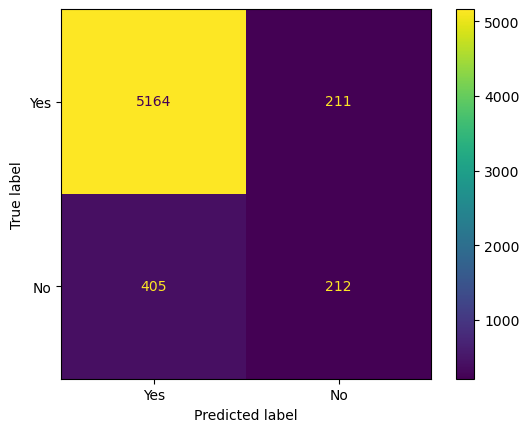

Modèle : GradientBoostingClassifier()
Accuracy Score: 0.820260347129506
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89      5375
           1       0.34      0.76      0.47       617

    accuracy                           0.82      5992
   macro avg       0.65      0.79      0.68      5992
weighted avg       0.90      0.82      0.85      5992



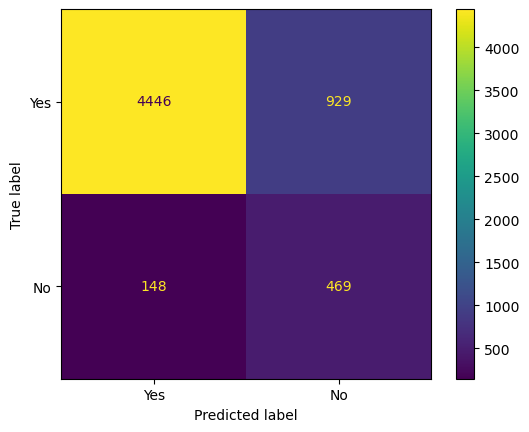

Modèle : AdaBoostClassifier()
Accuracy Score: 0.7963951935914553
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.80      0.88      5375
           1       0.30      0.74      0.43       617

    accuracy                           0.80      5992
   macro avg       0.63      0.77      0.65      5992
weighted avg       0.90      0.80      0.83      5992



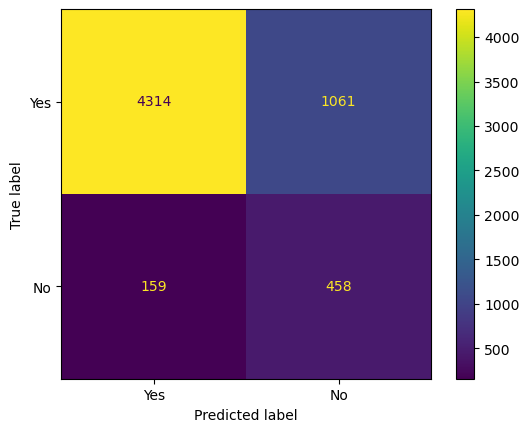

Modèle : RandomForestClassifier()
Accuracy Score: 0.9088785046728972
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      5375
           1       0.60      0.36      0.45       617

    accuracy                           0.91      5992
   macro avg       0.76      0.67      0.70      5992
weighted avg       0.90      0.91      0.90      5992



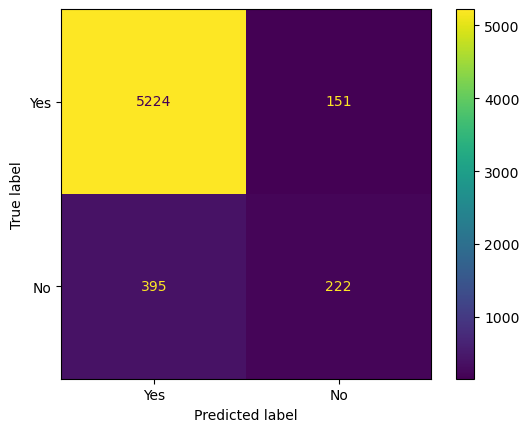

Modèle : LogisticRegression(max_iter=500)
Accuracy Score: 0.7812082777036048
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.86      5375
           1       0.29      0.79      0.43       617

    accuracy                           0.78      5992
   macro avg       0.63      0.78      0.65      5992
weighted avg       0.90      0.78      0.82      5992



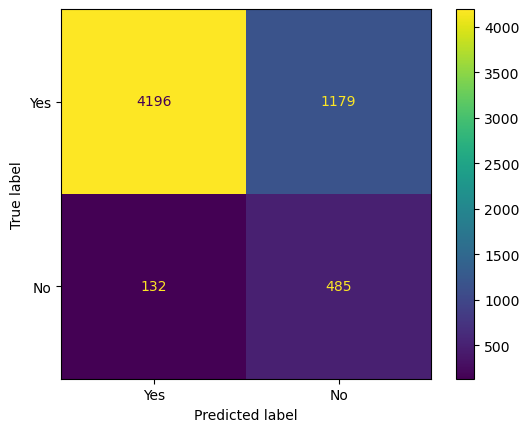

Modèle : SVC()
Accuracy Score: 0.8486315086782377
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      5375
           1       0.38      0.73      0.50       617

    accuracy                           0.85      5992
   macro avg       0.67      0.80      0.70      5992
weighted avg       0.90      0.85      0.87      5992



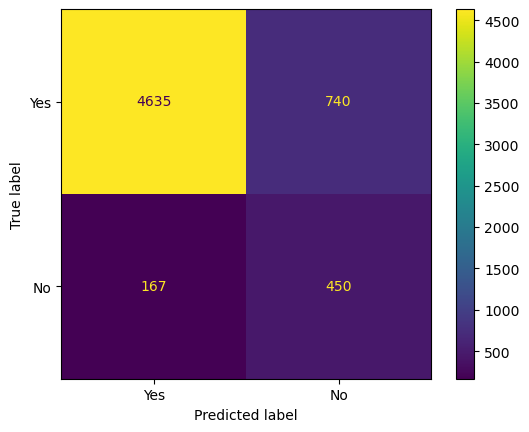

In [67]:
evaluation = Modelling(train_pca_features,train_pca_target,X_val,y_val,models_to_test)
evaluation.model_evaluation()

In [68]:
print('BestModel is:',  classification.best_model(type='name'))
print('Accuracy of model:',classification.best_model_accuracy())
print('Training Runtime in seconds',classification.best_model_runtime())
print('Classification Matrix:\n')
print(classification.best_model_clmatrix())

BestModel is: RandomForestClassifier
Accuracy of model: 90.888
Training Runtime in seconds 15.598
Classification Matrix:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5375
           1       0.60      0.36      0.45       617

    accuracy                           0.91      5992
   macro avg       0.76      0.67      0.70      5992
weighted avg       0.90      0.91      0.90      5992



Bien que les meilleurs modèles, du point de vue de leur précision globale soit le Random Forest et le Bagging avec un taux d'efficacité d'environ 95%, cela ne signifie pas que la capacité de la précision du modèle à détecter les churners correspond à ce taux. Par conséquent, cette métrique est inappropriée, voire inapte à répondre à la problématique posée: La détection des churners. Ainsi, la métrique qui apparait être la plus pertinente à mesurer l'efficacité du modèle en fonction de la problématique de l'entreprise est le "f1-score". Nous observons que les modèles avec les meilleurs taux de précision globale ne sont pas forcément les plus efficaces en terme de "f1-score". En revanche, le meilleur "f1-score" est obtenu avec le modèle Support Vector Machine. Ce modèle a une précision globale de 85% environ mais avec un "f1-score" de 50%. C'est le "f1-score" le plus élevé de tous. En d'autres termes, le modèle Support Vector Machine détecte le mieux les churners dans un rapport d'une fois sur deux.

IIème PARTIE: MODELISATION AVEC DONNEES D'ORIGINE STANDARDISEES

In [69]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67,Churn
0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,...,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1118.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,...,1.0,1.0,1.0,802,57.74,19.38,18.74,0.00,2678.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,...,1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,1369.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.280,482.46,23.53,...,1.0,1.0,1.0,2607,0.00,0.00,0.00,0.00,1068.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.740,162.76,0.00,...,1.0,1.0,1.0,511,0.00,2.45,21.89,0.00,1226.0,0


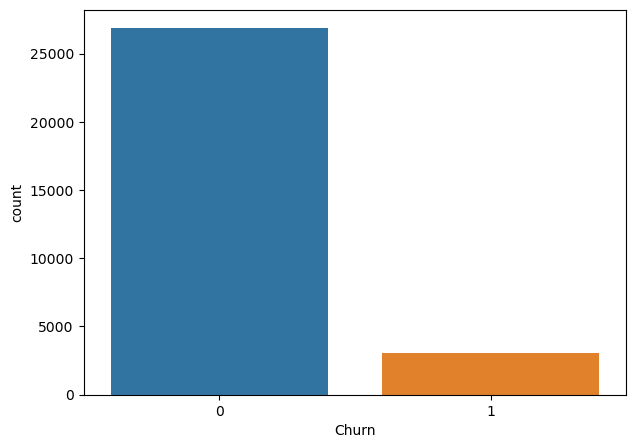

In [70]:
# Présentation de la proportion des churners par rapport aux abonnés fidèles
plt.figure(figsize=(7,5))
sns.countplot(data=df,x="Churn");

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29960 entries, 0 to 99997
Columns: 154 entries, arpu_6 to Churn
dtypes: float64(128), int64(26)
memory usage: 35.4 MB


In [72]:
df.isnull().values.sum()

0

In [73]:
y_br = df['Churn']
X_br = df.drop(['Churn'], axis=1)

In [74]:
y_br.head()

0     1
7     1
8     0
13    0
16    0
Name: Churn, dtype: int64

In [75]:
X_br.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67
0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,...,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1118.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,...,0,1.0,1.0,1.0,802,57.74,19.38,18.74,0.00,2678.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,...,0,1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,1369.0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.280,482.46,23.53,...,0,1.0,1.0,1.0,2607,0.00,0.00,0.00,0.00,1068.0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.740,162.76,0.00,...,0,1.0,1.0,1.0,511,0.00,2.45,21.89,0.00,1226.0


In [76]:
X_train_br, X_test_br, y_train_br, y_test_br = train_test_split(X_br, y_br, test_size = 0.4, random_state = seed, stratify = y_br)

X_val_br, X_test_br, y_val_br, y_test_br = train_test_split(X_test_br, y_test_br, test_size = 0.5, random_state = seed, stratify = y_test_br)

In [77]:
pd.DataFrame(y_br).value_counts(normalize = True)

Churn
0        0.896929
1        0.103071
dtype: float64

In [78]:
pd.DataFrame(y_test_br).value_counts(normalize = True)

Churn
0        0.896862
1        0.103138
dtype: float64

In [79]:
pd.DataFrame(y_val_br).value_counts(normalize = True)

Churn
0        0.897029
1        0.102971
dtype: float64

In [80]:
# Sur échantillonnage
X_up_br = X_train_br

X_up_br['Churn'] = y_train_br.values

minority_br = X_up_br[X_up_br.Churn == 1]

majority_br = X_up_br[X_up_br.Churn == 0]

minority_upsampled_br = resample(minority_br, replace = True, n_samples = len(majority_br), random_state = seed)

upsampled_br = pd.concat([majority_br, minority_upsampled_br])

upsampled_br.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67,Churn
37550,592.597,423.130,55.588,372.99,164.29,6.64,808.39,661.61,68.96,0.0,...,1.0,1.0,1.0,577,0.00,0.00,0.00,0.0,1532.0,0
95997,512.899,656.806,475.119,315.06,413.06,290.08,133.71,185.99,80.33,0.0,...,1.0,1.0,1.0,373,163.04,104.90,104.62,0.0,1504.0,0
46208,658.739,1282.450,0.000,0.00,0.00,32.36,29.24,0.00,92.14,0.0,...,1.0,1.0,1.0,452,63.87,1073.62,872.25,0.0,3572.0,0
61723,371.087,476.409,258.274,792.34,869.21,349.74,55.18,228.99,79.49,0.0,...,1.0,1.0,1.0,321,0.00,0.00,0.00,0.0,1300.0,0
38885,676.231,849.140,851.909,1339.79,1554.73,1880.26,362.64,282.44,82.91,7.0,...,1.0,1.0,1.0,370,0.00,0.00,0.00,0.0,2094.0,0


In [81]:
upsampled_br.to_csv('true_df_balanced.csv')

In [82]:
upsampled_br['Churn'].value_counts(normalize = True)

0    0.5
1    0.5
Name: Churn, dtype: float64

In [83]:
# Spécifions les données sur échantillonnées
y_train_up_br = upsampled_br['Churn']
X_train_up_br = upsampled_br.drop('Churn', axis = 1)

In [84]:
# Spécifions les données d'entrainement de base
y_train_br = X_train_br['Churn']
X_train_br = X_train_br.drop('Churn', axis = 1)

In [85]:
train_features = X_train_up_br
train_target = y_train_up_br

In [86]:
train_features.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67
37550,592.597,423.130,55.588,372.99,164.29,6.64,808.39,661.61,68.96,0.0,...,0,1.0,1.0,1.0,577,0.00,0.00,0.00,0.0,1532.0
95997,512.899,656.806,475.119,315.06,413.06,290.08,133.71,185.99,80.33,0.0,...,0,1.0,1.0,1.0,373,163.04,104.90,104.62,0.0,1504.0
46208,658.739,1282.450,0.000,0.00,0.00,32.36,29.24,0.00,92.14,0.0,...,0,1.0,1.0,1.0,452,63.87,1073.62,872.25,0.0,3572.0
61723,371.087,476.409,258.274,792.34,869.21,349.74,55.18,228.99,79.49,0.0,...,0,1.0,1.0,1.0,321,0.00,0.00,0.00,0.0,1300.0
38885,676.231,849.140,851.909,1339.79,1554.73,1880.26,362.64,282.44,82.91,7.0,...,0,1.0,1.0,1.0,370,0.00,0.00,0.00,0.0,2094.0


NORMALISATION DES DONNÉES (Entre 0 et 1)

Comme observé sur la dataframe des variables indépendantes ci-dessus, il est nécessaire de normaliser les valeurs...

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaler  = scaler.fit(train_features)
train_features = data_scaler.transform(train_features)

X_val_br = data_scaler.transform(X_val_br)
X_test_br = data_scaler.transform(X_test_br)

# Transformons les tableaux Numpy obtenus en dataframe
train_features = pd.DataFrame(train_features, columns=X_train_up_br.columns)
X_val_br = pd.DataFrame(X_val_br, columns=X_train_up_br.columns)
X_test_br = pd.DataFrame(X_test_br, columns=X_train_up_br.columns)

In [88]:
# Vérification de la normalisation
train_features.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67
0,0.095076,0.065586,0.029035,0.053200,0.020139,0.000949,0.120425,0.079555,0.004923,0.000000,...,0.0,1.0,1.0,1.0,0.095871,0.000000,0.000000,0.000000,0.0,0.006273
1,0.092418,0.071875,0.041199,0.044937,0.050634,0.041461,0.019919,0.022364,0.005735,0.000000,...,0.0,1.0,1.0,1.0,0.046607,0.012623,0.011445,0.013800,0.0,0.005898
2,0.097281,0.088711,0.027423,0.000000,0.000000,0.004625,0.004356,0.000000,0.006578,0.000000,...,0.0,1.0,1.0,1.0,0.065685,0.004945,0.117136,0.115054,0.0,0.033556
3,0.087690,0.067020,0.034912,0.113012,0.106550,0.049988,0.008220,0.027535,0.005675,0.000000,...,0.0,1.0,1.0,1.0,0.034050,0.000000,0.000000,0.000000,0.0,0.003170
4,0.097865,0.077050,0.052124,0.191095,0.190582,0.268746,0.054022,0.033962,0.005919,0.002679,...,0.0,1.0,1.0,1.0,0.045883,0.000000,0.000000,0.000000,0.0,0.013789


Avant la modélisation, sélectionnons les meilleures variables prédictrices pour notre problématique.

In [89]:
rf_var = RandomForestClassifier()
rf_var.fit(train_features, train_target)

print(classification_report(y_val_br, rf_var.predict(X_val_br)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5375
           1       0.69      0.53      0.60       617

    accuracy                           0.93      5992
   macro avg       0.82      0.75      0.78      5992
weighted avg       0.92      0.93      0.92      5992



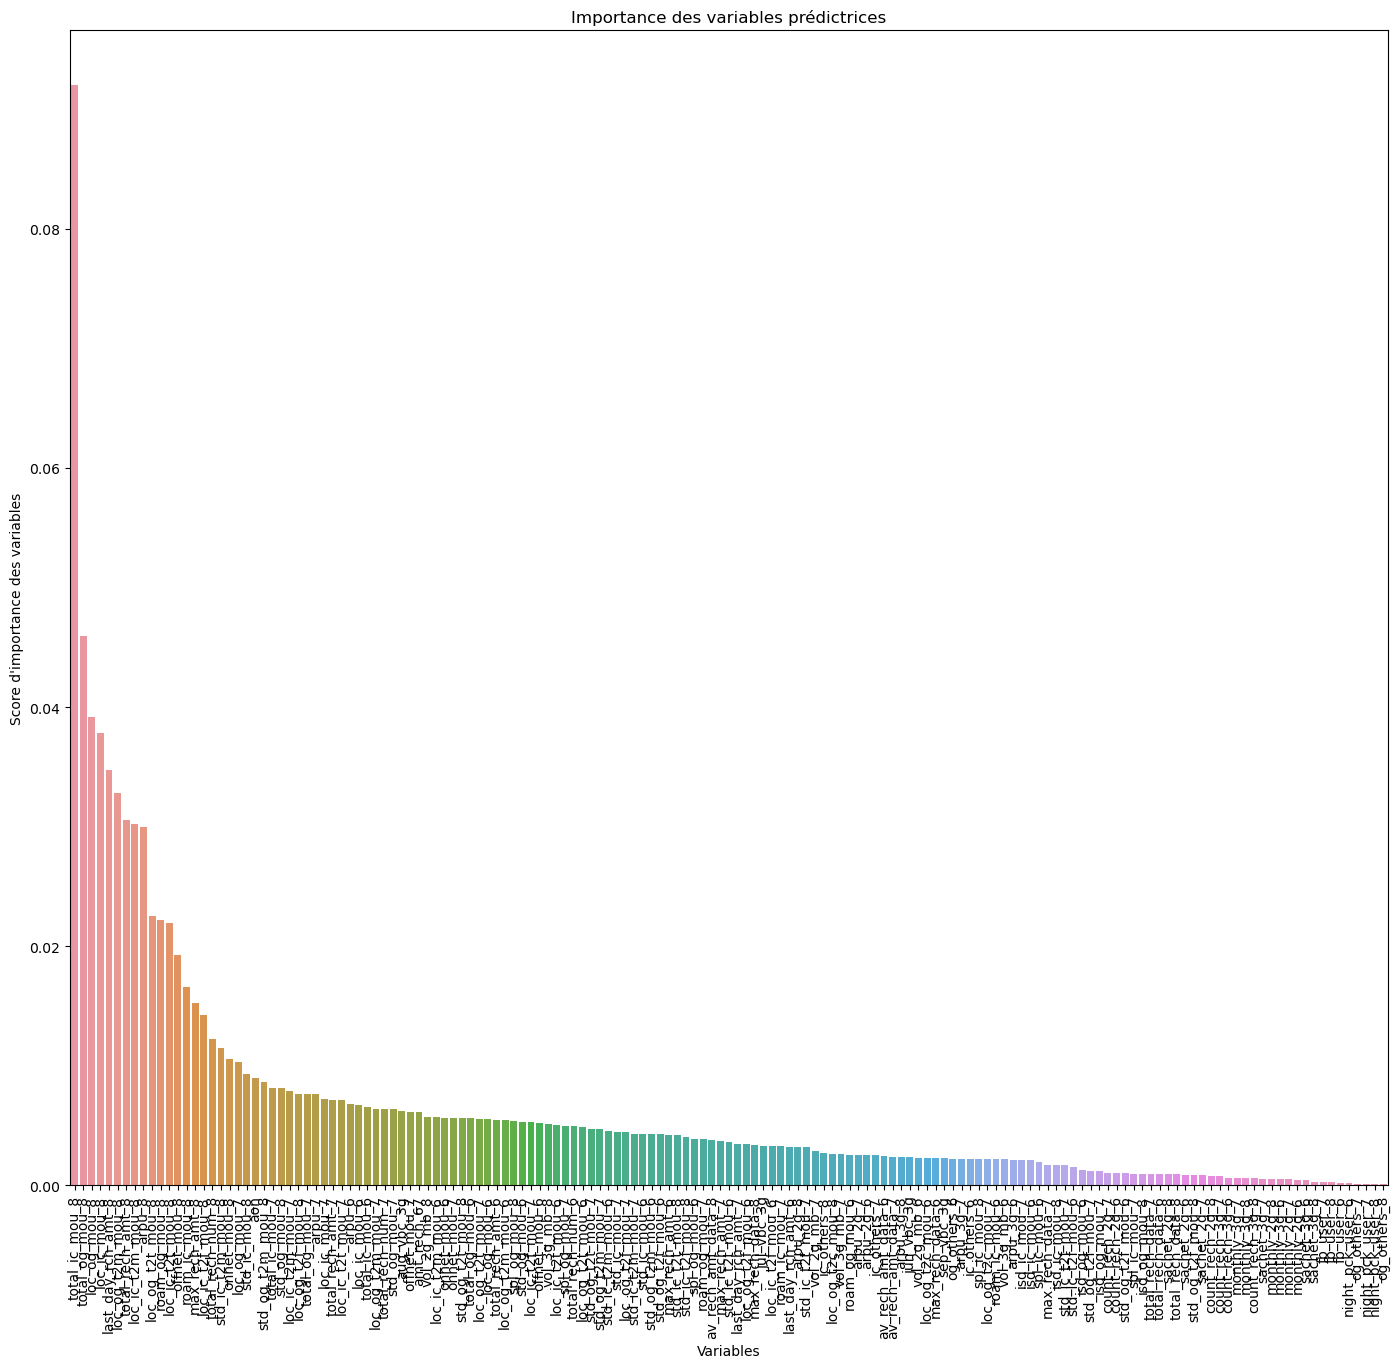

In [90]:
# Déterminons les variables ou les prédicteurs significatifs pour la détection des churners

plt.figure(figsize=(17,15))

churn_importance = pd.Series(rf_var.feature_importances_, index = train_features.columns).sort_values(ascending=False)

sns.barplot(x = churn_importance.index, y = churn_importance)
plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel("Score d'importance des variables")
plt.title("Importance des variables prédictrices")
plt.show()

In [91]:
# Affichage des variables avec leur importance dans le jeu de données
churn_importance

total_ic_mou_8        0.092005
total_og_mou_8        0.045947
loc_og_mou_8          0.039209
loc_ic_mou_8          0.037796
last_day_rch_amt_8    0.034727
                        ...   
night_pck_user_6      0.000158
og_others_7           0.000134
night_pck_user_7      0.000123
night_pck_user_8      0.000114
og_others_8           0.000076
Length: 153, dtype: float64

In [92]:
seuil = 0.0099
churn_var_selected = churn_importance[churn_importance > seuil].index.to_list()

train_features_br = train_features[churn_var_selected]
X_val_br = X_val_br[churn_var_selected]
X_test_br = X_test_br[churn_var_selected]

# Nombre de variables obtenues
len(churn_var_selected)

20

In [93]:
train_features_br.to_csv("train_features_br_str.csv")
train_target.to_csv("train_target_str.csv")

In [94]:
churn_var_selected

['total_ic_mou_8',
 'total_og_mou_8',
 'loc_og_mou_8',
 'loc_ic_mou_8',
 'last_day_rch_amt_8',
 'loc_og_t2m_mou_8',
 'total_rech_amt_8',
 'loc_ic_t2m_mou_8',
 'arpu_8',
 'loc_og_t2t_mou_8',
 'roam_og_mou_8',
 'loc_ic_t2t_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'max_rech_amt_8',
 'loc_ic_t2f_mou_8',
 'total_rech_num_8',
 'std_ic_t2m_mou_8',
 'onnet_mou_8',
 'loc_og_mou_7']

In [95]:
train_features_br.head()

,total_ic_mou_8,total_og_mou_8,loc_og_mou_8,loc_ic_mou_8,last_day_rch_amt_8,loc_og_t2m_mou_8,total_rech_amt_8,loc_ic_t2m_mou_8,arpu_8,loc_og_t2t_mou_8,roam_og_mou_8,loc_ic_t2t_mou_8,offnet_mou_8,roam_ic_mou_8,max_rech_amt_8,loc_ic_t2f_mou_8,total_rech_num_8,std_ic_t2m_mou_8,onnet_mou_8,loc_og_mou_7
0,0.011763,0.005581,0.000670,0.006948,0.005884,0.000335,0.000883,0.004285,0.029035,0.000430,0.000000,0.003879,0.004923,0.000000,0.005884,0.000000,0.020408,0.001938,0.000949,0.003783
1,0.014941,0.008055,0.020254,0.014474,0.007355,0.004622,0.011275,0.005840,0.041199,0.017828,0.048208,0.012566,0.005735,0.087337,0.097087,0.000000,0.025510,0.000381,0.041461,0.077459
2,0.000000,0.000000,0.011516,0.016322,0.000000,0.008135,0.000000,0.010149,0.027423,0.002461,0.000000,0.004054,0.006578,0.000000,0.000000,0.000585,0.005102,0.000360,0.004625,0.000000
3,0.015897,0.030566,0.001182,0.003721,0.005884,0.001318,0.006178,0.003727,0.034912,0.000000,0.000000,0.000000,0.005675,0.000000,0.005884,0.000000,0.076531,0.013291,0.049988,0.002391
4,0.010197,0.139797,0.007863,0.009856,0.014710,0.005595,0.021977,0.005212,0.052124,0.003181,0.000000,0.006456,0.005919,0.000000,0.038247,0.000762,0.086735,0.000921,0.268746,0.009950


In [96]:
train_target.head()

37550    0
95997    0
46208    0
61723    0
38885    0
Name: Churn, dtype: int64

In [97]:
class Modelling_br:
    def __init__(self, X_train, Y_train, X_val_br, y_val_br, models):
        self.X_train = X_train
        self.X_val_br = X_val_br
        self.Y_train = Y_train
        self.y_val_br = y_val_br
        self.models = models
    
    def fit(self):
        model_acc = []
        model_time= []
        for i in self.models:
            start=time.time()
            i.fit(self.X_train,self.Y_train)
            model_acc.append(accuracy_score(self.y_val_br,i.predict(self.X_val_br)))
            stop=time.time()
            model_time.append((stop-start))
            print(i,'has been fit')
        self.models_output = pd.DataFrame({'Models':self.models,'Accuracy':model_acc,'Runtime (s)':model_time})
        
    def results(self):
        models=self.models_output
        models = models.sort_values(by=['Accuracy','Runtime (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
        self.best = models['Models'][0]
        models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
        models['Accuracy']=models['Accuracy'].round(5)*100
        self.models_output_cleaned=models
        return(models)
        
    def best_model(self,type):
        if type=='model':
            return(self.best)
        elif type=='name':
            return(self.models_output_cleaned['Models'][0])
    
    def best_model_accuracy(self):
        return(self.models_output_cleaned['Accuracy'][0])
    
    def best_model_runtime(self):
        return(round(self.models_output_cleaned['Runtime (s)'][0],3))
    
    def best_model_predict(self,X_val_br):
        return(self.best.predict(X_val_br))
    
    def best_model_clmatrix(self):
        return(classification_report(self.y_val_br,self.best.predict(self.X_val_br)))
    
    def model_evaluation_br(self):
        for i in self.models:
            print("Modèle :", i)
            print("===========================================================")
            pred = i.predict(self.X_val_br)
            print("Accuracy Score:",accuracy_score(self.y_val_br,pred))
            cm = confusion_matrix(self.y_val_br,pred)
            cmd = ConfusionMatrixDisplay(cm,display_labels=["Yes","No"])
            cmd.plot()
            print("Classification Report:\n",classification_report(self.y_val_br, pred))
            plt.show()
            print("===========================================================")

In [98]:
classification_br = Modelling_br(train_features_br,train_target,X_val_br,y_val_br,models_to_test)
classification_br.fit()

BaggingClassifier() has been fit
GradientBoostingClassifier() has been fit
AdaBoostClassifier() has been fit
RandomForestClassifier() has been fit
LogisticRegression(max_iter=500) has been fit
SVC() has been fit


In [99]:
classification_br.results()

,Models,Accuracy,Runtime (s)
0,RandomForestClassifier,92.256,8.742187
1,BaggingClassifier,91.839,4.274717
2,GradientBoostingClassifier,86.482,15.093001
3,AdaBoostClassifier,85.497,3.265516
4,SVC,83.561,64.794046
5,LogisticRegression,74.766,0.531450


Modèle : BaggingClassifier()
Accuracy Score: 0.9183911882510013
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      5375
           1       0.62      0.53      0.57       617

    accuracy                           0.92      5992
   macro avg       0.78      0.75      0.76      5992
weighted avg       0.91      0.92      0.92      5992



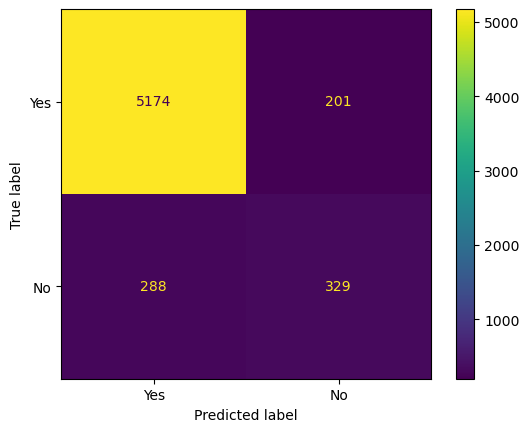

Modèle : GradientBoostingClassifier()
Accuracy Score: 0.8648197596795728
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92      5375
           1       0.42      0.80      0.55       617

    accuracy                           0.86      5992
   macro avg       0.70      0.84      0.74      5992
weighted avg       0.92      0.86      0.88      5992



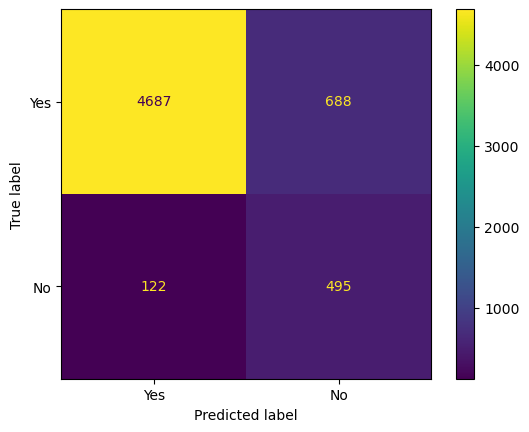

Modèle : AdaBoostClassifier()
Accuracy Score: 0.8549732977303071
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      5375
           1       0.40      0.78      0.53       617

    accuracy                           0.85      5992
   macro avg       0.68      0.82      0.72      5992
weighted avg       0.91      0.85      0.87      5992



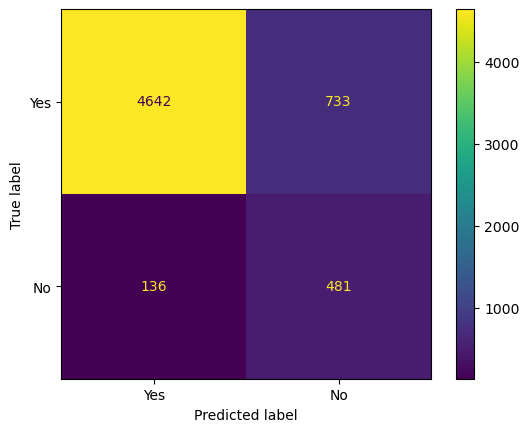

Modèle : RandomForestClassifier()
Accuracy Score: 0.9225634178905207
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      5375
           1       0.66      0.52      0.58       617

    accuracy                           0.92      5992
   macro avg       0.80      0.74      0.77      5992
weighted avg       0.92      0.92      0.92      5992



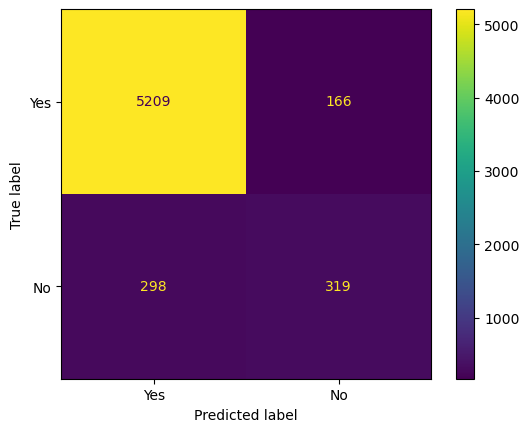

Modèle : LogisticRegression(max_iter=500)
Accuracy Score: 0.7476635514018691
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.74      0.84      5375
           1       0.27      0.82      0.40       617

    accuracy                           0.75      5992
   macro avg       0.62      0.78      0.62      5992
weighted avg       0.90      0.75      0.79      5992



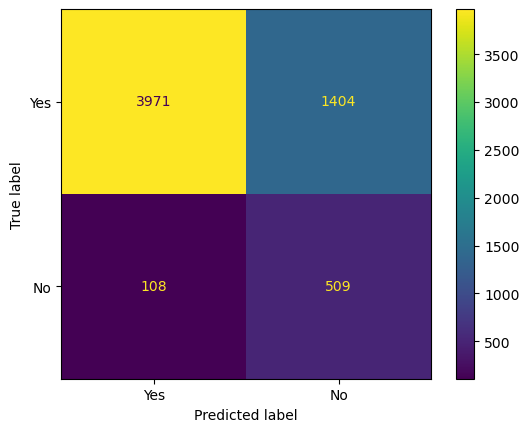

Modèle : SVC()
Accuracy Score: 0.8356141522029372
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      5375
           1       0.36      0.78      0.50       617

    accuracy                           0.84      5992
   macro avg       0.67      0.81      0.70      5992
weighted avg       0.91      0.84      0.86      5992



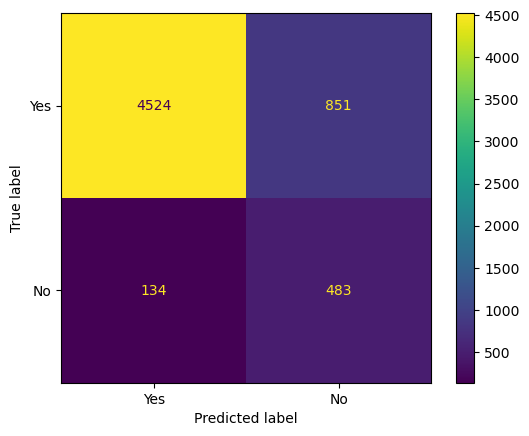

In [100]:
evaluation_br = Modelling_br(train_features_br,train_target,X_val_br,y_val_br,models_to_test)
evaluation_br.model_evaluation_br()

La modélisation effectuée avec les composantes principales nous révèle que le meilleur modèle en terme de "f1-score" est le Support Vector Machine avec un capacité de détection des churners de 50%. Lorsque nous utilisons les données d'origine tout en ne sélectionnant que les variables dont le score d'importance est supérieur à 0.0099, il se trouve que les meilleurs modèles, du point de vue de la métrique "f1-score", sont le Bagging et le Random Forest avec un taux d'efficacité de détection des churners de 58% et 60% respectivement. De plus, même si cette métrique n'est pas très pertinente dans le cadre de cette problématique, le Random Forest est le meilleur modèle en terme de précision globale (Accuracy). Elle est nettement supérieure à celle du modèle Bagging, c'est-à-dire 92.57 % contre 91.77 %.

In [101]:
df_c = pd.read_csv('true_df.csv')

df_c.head()


,Unnamed: 0,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67,Churn
0,0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,...,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1118.0,1
1,7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,...,1.0,1.0,1.0,802,57.74,19.38,18.74,0.00,2678.0,1
2,8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,...,1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,1369.0,0
3,13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.280,482.46,...,1.0,1.0,1.0,2607,0.00,0.00,0.00,0.00,1068.0,0
4,16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.740,162.76,...,1.0,1.0,1.0,511,0.00,2.45,21.89,0.00,1226.0,0


In [102]:
y = pd.DataFrame(df_c['Churn'])
X = pd.DataFrame(df_c.drop('Churn', axis = 1))

In [103]:
y.head()

,Churn
0,1
1,1
2,0
3,0
4,0


In [104]:
X.head()

,Unnamed: 0,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,amt_rech_67
0,0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,...,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1118.0
1,7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,...,0,1.0,1.0,1.0,802,57.74,19.38,18.74,0.00,2678.0
2,8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,...,0,1.0,1.0,1.0,315,21.03,910.65,122.16,0.00,1369.0
3,13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.280,482.46,...,0,1.0,1.0,1.0,2607,0.00,0.00,0.00,0.00,1068.0
4,16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.740,162.76,...,0,1.0,1.0,1.0,511,0.00,2.45,21.89,0.00,1226.0
